<a href="https://colab.research.google.com/github/rodrigo8502/projeto5/blob/main/trabalho8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

!pip install pandas
!pip install scikit-learn





# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge


In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/rodrigo8502/projeto5/refs/heads/main/social_media_usage.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')



# Mostra as primeiras linhas do dataset
dataset.head()

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21


In [ ]:
dataset.tail() # Mostra as últimas cinco linhas do dataset

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
995,U_996,LinkedIn,479,4,72,15
996,U_997,Instagram,499,14,110,49
997,U_998,Facebook,318,6,105,9
998,U_999,TikTok,305,15,151,6
999,U_1000,Pinterest,115,17,81,39


In [ ]:
dataset.shape # Mostra o número de linhas e colunas

(1000, 6)

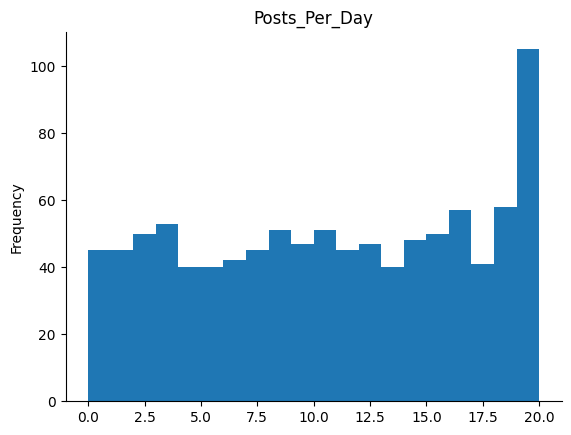

In [ ]:
# @title Posts_Per_Day
## Criação de um histograma para visualizar a distribuição dos dados da coluna Posts_Per_Day

from matplotlib import pyplot as plt
dataset['Posts_Per_Day'].plot(kind='hist', bins=20, title='Posts_Per_Day')
plt.gca().spines[['top', 'right',]].set_visible(False)

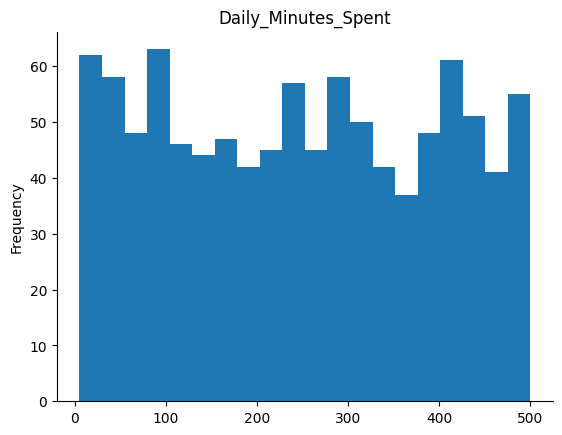

In [ ]:
# @title Daily_Minutes_Spent
## Criação de um histograma para visualizar a distribuição dos dados da coluna Daily_Minutes_Spent

from matplotlib import pyplot as plt
dataset['Daily_Minutes_Spent'].plot(kind='hist', bins=20, title='Daily_Minutes_Spent')
plt.gca().spines[['top', 'right',]].set_visible(False)

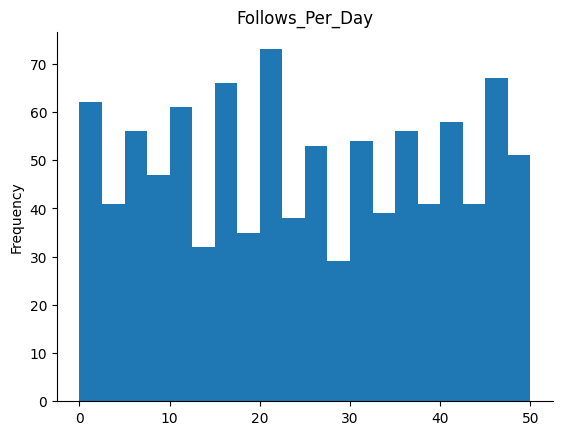

In [ ]:
# @title Follows_Per_Day
## Criação de um histograma para visualizar a distribuição dos dados da coluna Follows_Per_Day
from matplotlib import pyplot as plt
dataset['Follows_Per_Day'].plot(kind='hist', bins=20, title='Follows_Per_Day')
plt.gca().spines[['top', 'right',]].set_visible(False)

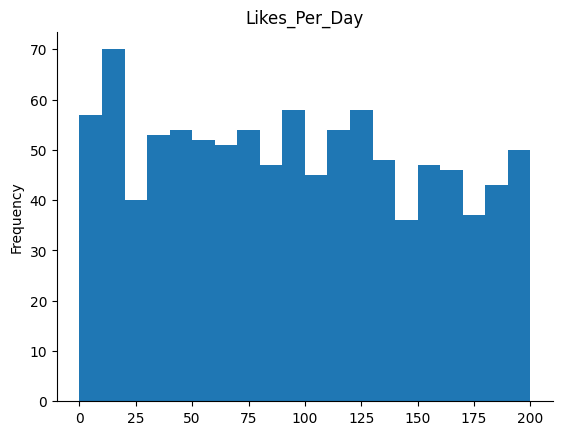

In [ ]:
# @title Likes_Per_Day
## Criação de um histograma para visualizar a distribuição dos dados da coluna Likes_Per_Day

from matplotlib import pyplot as plt
dataset['Likes_Per_Day'].plot(kind='hist', bins=20, title='Likes_Per_Day')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(dataset.isnull().sum()) ## Verifica a quantidade de valores nulos em cada coluna


User_ID                0
App                    0
Daily_Minutes_Spent    0
Posts_Per_Day          0
Likes_Per_Day          0
Follows_Per_Day        0
dtype: int64


In [ ]:
df_one_hot = pd.get_dummies(dataset, columns=['App'], prefix='App') # Aplicação do One-hot encoding na coluna app pois contém variáveis nominais sem uma ordem específica

In [ ]:
# Verificar os valores únicos na coluna 'Follows_Per_Day'
valores_unicos = dataset['Follows_Per_Day'].value_counts()
print(valores_unicos)


Follows_Per_Day
47    30
20    29
9     27
15    25
2     24
22    24
42    23
4     23
10    23
12    23
39    23
5     22
43    22
0     22
16    22
45    21
35    21
30    21
21    20
23    20
32    20
25    20
34    20
8     20
37    20
44    19
7     19
17    19
33    19
24    18
41    18
38    18
3     18
14    18
49    18
19    18
26    18
28    18
18    17
40    17
50    17
1     16
48    16
46    16
6     15
36    15
11    15
27    15
13    14
31    13
29    11
Name: count, dtype: int64


In [ ]:
# Estatísticas descritivas
print(dataset['Follows_Per_Day'].describe())


count    1000.000000
mean       24.698000
std        14.842948
min         0.000000
25%        12.000000
50%        24.000000
75%        38.000000
max        50.000000
Name: Follows_Per_Day, dtype: float64


In [ ]:


# Calcular a correlação entre as colunas numéricas
correlation_matrix = X_encoded.corr()

print(correlation_matrix)


                     App_Instagram  App_LinkedIn  App_Pinterest  App_Snapchat  \
App_Instagram             1.000000     -0.167494      -0.162791     -0.173463   
App_LinkedIn             -0.167494      1.000000      -0.167494     -0.178474   
App_Pinterest            -0.162791     -0.167494       1.000000     -0.173463   
App_Snapchat             -0.173463     -0.178474      -0.173463      1.000000   
App_TikTok               -0.163466     -0.168189      -0.163466     -0.174182   
App_Twitter              -0.162791     -0.167494      -0.162791     -0.173463   
Daily_Minutes_Spent       0.046145     -0.032103      -0.030780      0.026987   
Posts_Per_Day             0.069869     -0.006251       0.023710     -0.018901   
Likes_Per_Day             0.030232      0.017315      -0.018007     -0.006438   

                     App_TikTok  App_Twitter  Daily_Minutes_Spent  \
App_Instagram         -0.163466    -0.162791             0.046145   
App_LinkedIn          -0.168189    -0.167494       

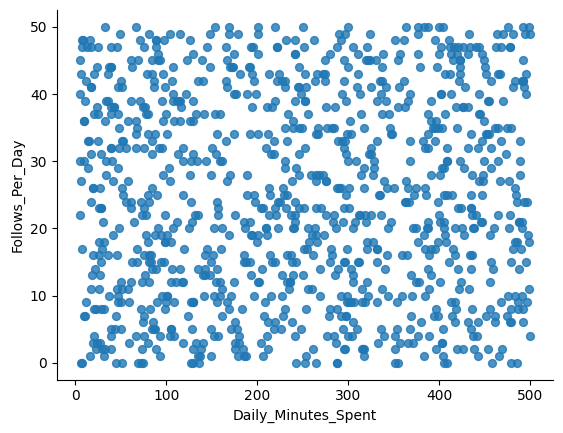

In [ ]:
# @title Daily_Minutes_Spent vs Follows_Per_Day
## Gráfico de dispersão gerado com as colunas Daily_Minutes_Spent e Follows_Per_Day

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='Daily_Minutes_Spent', y='Follows_Per_Day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,1:5]  # Pega as colunas 2 até 5
y = array[:, 5] # Seleciona a váriavel target 'Follows_Per_Day'
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação



# Parâmetros e partições da validação cruzada
scoring = 'neg_mean_squared_error'  # Para problemas de regressão, usamos 'neg_mean_squared_error'
num_particoes = 10  # Número de partições da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed)  # Validação cruzada para regressão


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Criando o OneHotEncoder com sparse=False
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# Aplicando a transformação
encoded_columns = encoder.fit_transform(dataset[["App"]])

# Verificando o tipo de dados após a codificação
print(encoded_columns.dtype)  # Isso será 'float64' ou 'int64'

float64


In [ ]:
# Transformando o resultado para um DataFrame e adicionando as colunas codificadas ao DataFrame original
# Converting the sparse matrix to a dense one if needed



encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(["App"]))

# Concatenando com as colunas numéricas
X_encoded = pd.concat([encoded_df, dataset.drop(columns=["User_ID", "App", "Follows_Per_Day"])], axis=1)

# Separando a variável dependente (target)
y = dataset["Follows_Per_Day"]

In [ ]:
print(X_encoded.isnull().sum())

App_Instagram          0
App_LinkedIn           0
App_Pinterest          0
App_Snapchat           0
App_TikTok             0
App_Twitter            0
Daily_Minutes_Spent    0
Posts_Per_Day          0
Likes_Per_Day          0
dtype: int64


In [ ]:
# Verifique os tipos de dados de X e y
print(y_train.dtype)  # Tipos de dados de X

float64


In [ ]:
y_train = np.array(y_train, dtype=np.float64)  # Para valores contínuos (reais)

In [ ]:
# Converter X e y para float
X = X.astype(float)
y = y.astype(float)

In [ ]:
# Verificar os tipos de dados de X e y
print("Tipos de dados de X:", X.dtype)
print("Tipos de dados de y:", y.dtype)

Tipos de dados de X: float64
Tipos de dados de y: float64


O SelectKbest foi utilizado para escolher os melhores atributos. Todos os tres atributos foram escolhidos, sendo atribuído uma pontuação elevada de 1.407 para o atributo 'Daily_Minutes_Spent', enquanto 'Posts_Per_Day' recebeu 0.328 e 'Likes_Per_Day 0.305.

In [ ]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_regression, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X_train, y_train)

# Reduz X para os atributos selecionados
features = fit.transform(X_train)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[1:5])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
# Exibe os atributos selecionados com base nos índices
selected_indices = fit.get_support(indices=True)  # Obtém os índices dos atributos selecionados
selected_features = X_train.columns[selected_indices]  # Obtém os nomes das colunas selecionadas

print("\nAtributos Selecionados:", selected_features)


Número original de atributos: 4

Número reduzido de atributos: 4

Atributos Originais: Index(['App', 'Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day'], dtype='object')

Scores dos Atributos Originais: [1.051e+00 1.687e-04 2.340e-03 1.480e+00 9.551e-01 2.944e-01 3.461e+00
 6.101e-01 1.230e+00]

Atributos Selecionados: Index(['App_Instagram', 'App_Snapchat', 'Daily_Minutes_Spent',
       'Likes_Per_Day'],
      dtype='object')


LR: -224.412627 (25.282939)
KNN: -272.486100 (37.029036)
CART: -443.881250 (42.710755)
SVR: -223.565944 (26.143309)
Bagging: -258.239315 (24.071591)
RF: -253.625046 (27.326782)
ET: -265.456951 (29.826692)
Ada: -223.834321 (24.779892)
GB: -238.616002 (28.485648)
Voting: -283.195790 (23.796264)


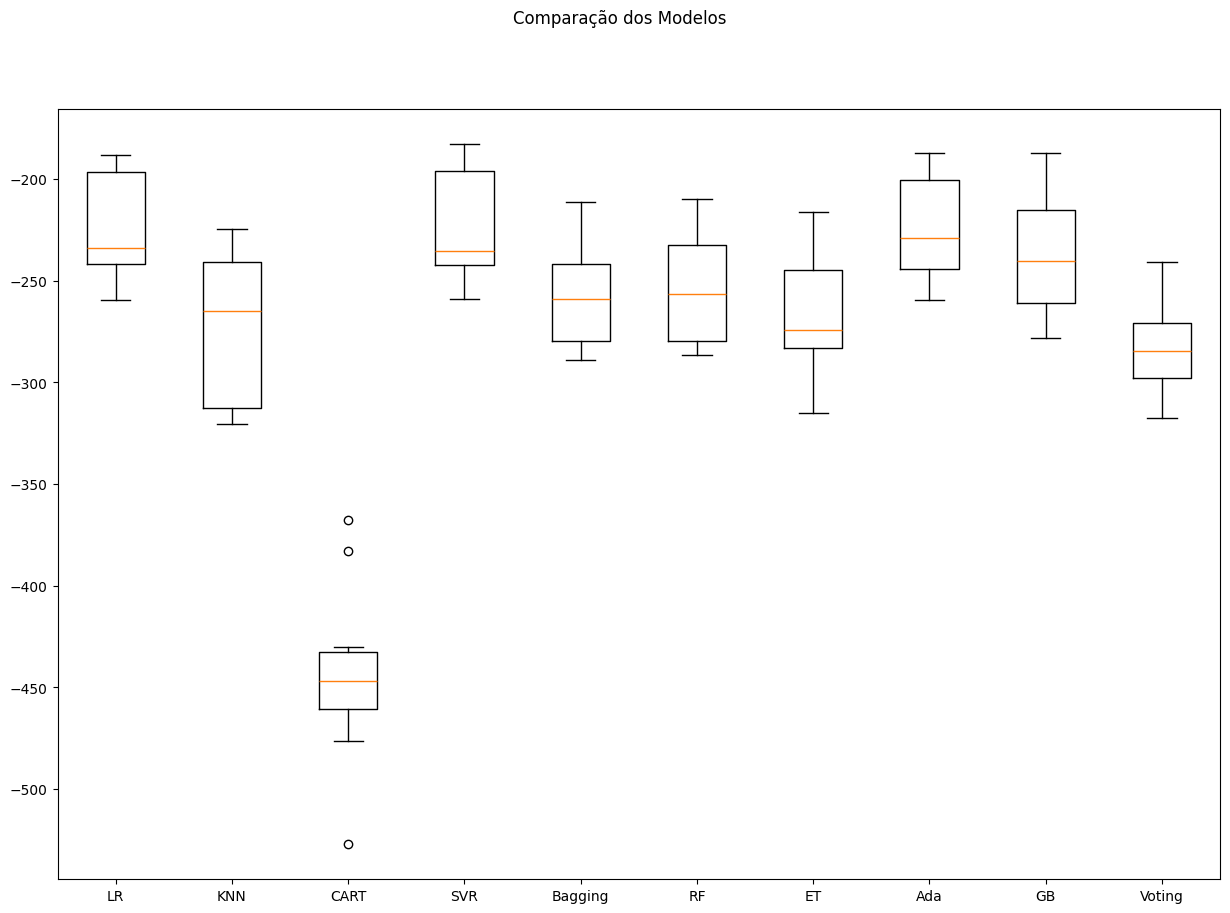

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Definindo os parâmetros do classificador base para o BaggingRegressor
base = DecisionTreeRegressor()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []

model2 = DecisionTreeRegressor()
bases.append(('cart', model2))
model3 = SVR()
bases.append(('svr', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingRegressor(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostRegressor(n_estimators=num_trees)))
models.append(('GB', GradientBoostingRegressor(n_estimators=num_trees)))
models.append(('Voting', VotingRegressor(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

KNN-orig: -272.486 (37.029)
LR-orig: -224.413 (25.283)
SVR-orig: -223.566 (26.143)
RF-orig: -249.441 (23.391)
ET-orig: -265.886 (28.208)
Ada-orig: -222.006 (22.666)
GB-orig: -238.415 (28.911)
Vot-orig: -282.075 (26.648)
KNN-padr: -263.487 (38.628)
LR-padr: -224.413 (25.283)
SVR-padr: -225.599 (23.808)
RF-padr: -248.515 (25.843)
ET-padr: -262.151 (29.489)
Ada-padr: -225.589 (23.983)
GB-padr: -239.276 (28.513)
Vot-padr: -278.696 (24.237)
KNN-norm: -262.405 (39.942)
LR-norm: -224.413 (25.283)
SVR-norm: -224.796 (23.584)
RF-norm: -248.367 (27.850)
ET-norm: -263.943 (26.736)
Ada-norm: -222.142 (23.606)
GB-norm: -239.132 (28.183)
Vot-norm: -278.568 (28.501)


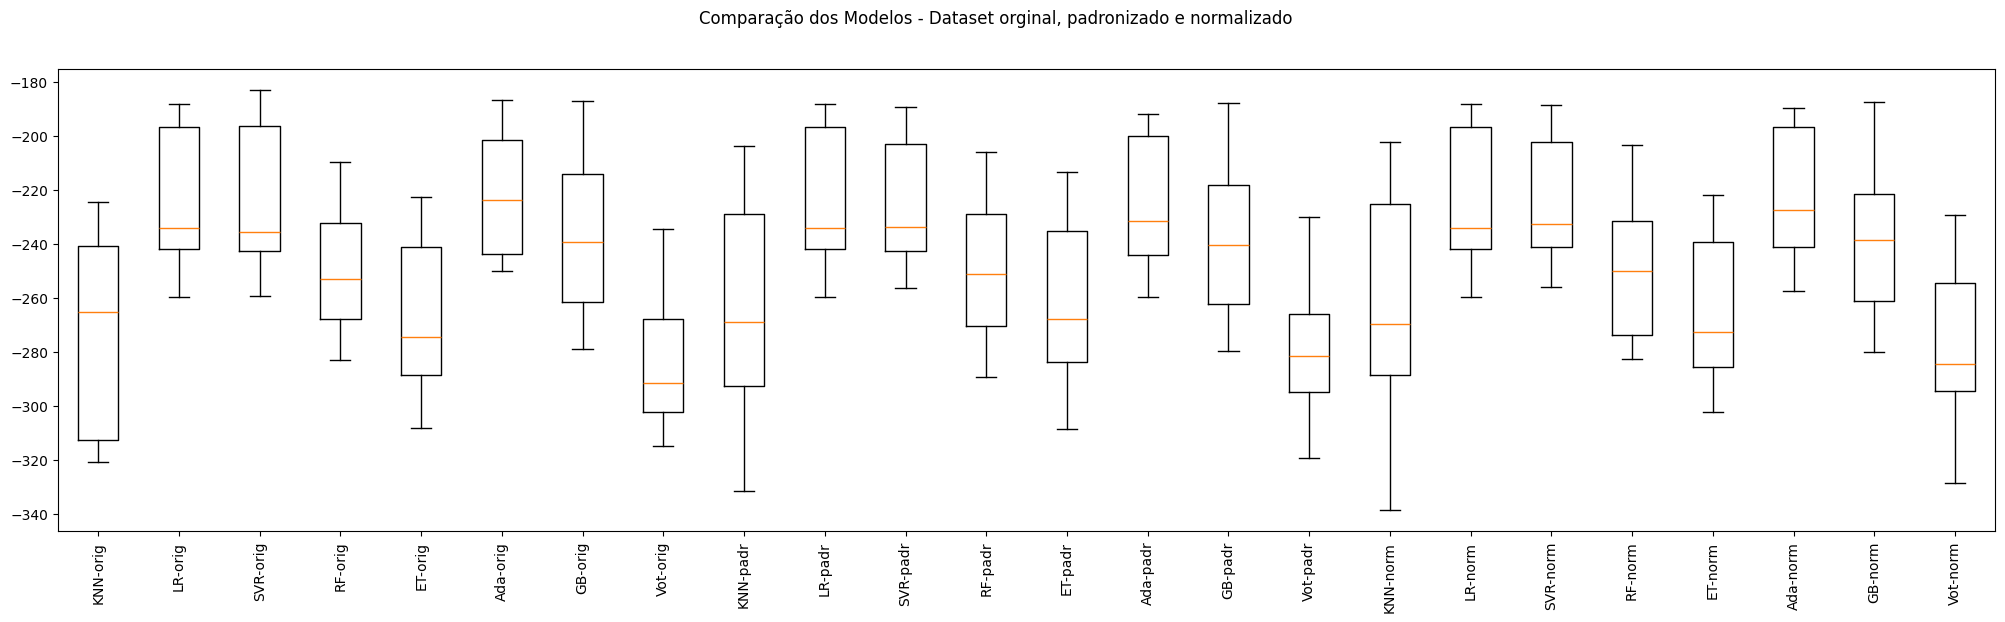

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados

LR = ('LR', LinearRegression())
SVR = ('SVR', SVR())
knn = ('KNN', KNeighborsRegressor())
random_forest = ('RF', RandomForestRegressor(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostRegressor(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingRegressor(n_estimators=num_trees))
voting = ('Voting', VotingRegressor(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original

pipelines.append(('KNN-orig', Pipeline([knn])))

pipelines.append(('LR-orig', Pipeline([LR])))
pipelines.append(('SVR-orig', Pipeline([SVR])))

pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado

pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('LR-padr', Pipeline([standard_scaler, LR])))

pipelines.append(('SVR-padr', Pipeline([standard_scaler, SVR])))

pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado

pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('LR-norm', Pipeline([min_max_scaler, LR])))

pipelines.append(('SVR-norm', Pipeline([min_max_scaler, SVR])))

pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [ ]:
# Tuning do AdaBoostRegressor

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
ada_boost = ('AdaBoost', AdaBoostRegressor())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('ada-orig', Pipeline(steps=[ada_boost])))
pipelines.append(('ada-padr', Pipeline(steps=[standard_scaler, ada_boost])))
pipelines.append(('ada-norm', Pipeline(steps=[min_max_scaler, ada_boost])))

param_grid = {
    'AdaBoost__n_estimators': [50, 100, 200],  # Número de estimadores (árvores)
    'AdaBoost__learning_rate': [0.01, 1, 1]  # Taxa de aprendizado
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: ada-orig - Melhor: -221.444808 usando {'AdaBoost__learning_rate': 1, 'AdaBoost__n_estimators': 100}
Sem tratamento de missings: ada-padr - Melhor: -221.993063 usando {'AdaBoost__learning_rate': 0.01, 'AdaBoost__n_estimators': 200}
Sem tratamento de missings: ada-norm - Melhor: -221.863273 usando {'AdaBoost__learning_rate': 0.01, 'AdaBoost__n_estimators': 50}


In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = AdaBoostRegressor()
model.fit(rescaledX, y_train)

# Estimativa do erro quadrático médio no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(mean_squared_error(y_test, predictions))

228.55358123909696


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X_train) # ajuste do scaler com TODO o dataset
rescaledX_train = scaler.transform(X_train) # aplicação da padronização com TODO o dataset
model.fit(rescaledX_train, y_train)

AdaBoostRegressor()

In [ ]:
# Novos dados - não sabemos a classe!
data = {'App':  ['Instagram', 'Tiktok', 'Facebook'],
        'Daily_Minutes_Spent':  [250, 15, 20],
        'Post_Per_Day': [150, 9, 25],
        'Likes_Per_Day': [120, 60, 15]

          }

atributos = ['App', 'Daily_Minutes_Spent', 'Post_Per_Day', 'Likes_Per_Day', ]
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = X_encoded.values
X_entrada = array_entrada[:,0:4].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(array_entrada)
print(rescaledEntradaX)

[[-0.41  -0.408  2.491 ...  0.257  0.942 -0.017]
 [-0.41  -0.408 -0.401 ... -0.396  0.613  0.383]
 [ 2.441 -0.408 -0.401 ...  0.686  0.449  0.435]
 ...
 [-0.41  -0.408 -0.401 ...  0.461 -0.703  0.174]
 [-0.41  -0.408 -0.401 ...  0.373  0.778  0.973]
 [-0.41  -0.408  2.491 ... -0.921  1.107 -0.243]]


In [ ]:
# Criando um modelo com todo o conjunto de treino
model = AdaBoostRegressor()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))



MSE 237.10
RMSE 15.40
